In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

## • create a dataframe where each user of the test group has the average difference, number of pageviews and number of commits
## • do not take project1 into account for calculations of the average difference and the number of commits
## • take the number of commits from the checker table

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query = """SELECT AVG((strftime('%s', first_commit_ts) - deadlines) / 3600) AS avg_diff, pageviews, num_commits
            FROM test JOIN (SELECT uid, COUNT(datetime) AS pageviews
                            FROM pageviews
                            GROUP BY pageviews.uid) AS pageview_count_table ON test.uid = pageview_count_table.uid
                      JOIN deadlines ON test.labname = deadlines.labs
                      JOIN (SELECT uid,  COUNT(timestamp) AS num_commits
                            FROM checker
                            WHERE status='ready' AND labname != 'project1'
                            GROUP BY uid) AS commits_count_table ON test.uid =
                              commits_count_table.uid
            WHERE labname IS NOT 'project1'
            GROUP BY test.uid
        """

df = pd.io.sql.read_sql(query, con, parse_dates='timestamp')
df

,avg_diff,pageviews,num_commits
0,-64.400000,28,35
1,-74.800000,89,13
2,-159.000000,143,33
3,-61.600000,47,29
4,-5.666667,3,4
5,-98.750000,16,62
6,-95.500000,10,35
7,-92.600000,179,43
8,-86.400000,149,33
9,-105.400000,317,13


## • the figsize is still the same, you can choose whatever fontsize you like as well as the color palette
## • the size of the dots should be 200
## • the width of the lines of the diagonal graphs (kde) should be 3

array([[<AxesSubplot: xlabel='avg_diff', ylabel='avg_diff'>,
        <AxesSubplot: xlabel='pageviews', ylabel='avg_diff'>,
        <AxesSubplot: xlabel='num_commits', ylabel='avg_diff'>],
       [<AxesSubplot: xlabel='avg_diff', ylabel='pageviews'>,
        <AxesSubplot: xlabel='pageviews', ylabel='pageviews'>,
        <AxesSubplot: xlabel='num_commits', ylabel='pageviews'>],
       [<AxesSubplot: xlabel='avg_diff', ylabel='num_commits'>,
        <AxesSubplot: xlabel='pageviews', ylabel='num_commits'>,
        <AxesSubplot: xlabel='num_commits', ylabel='num_commits'>]],
      dtype=object)

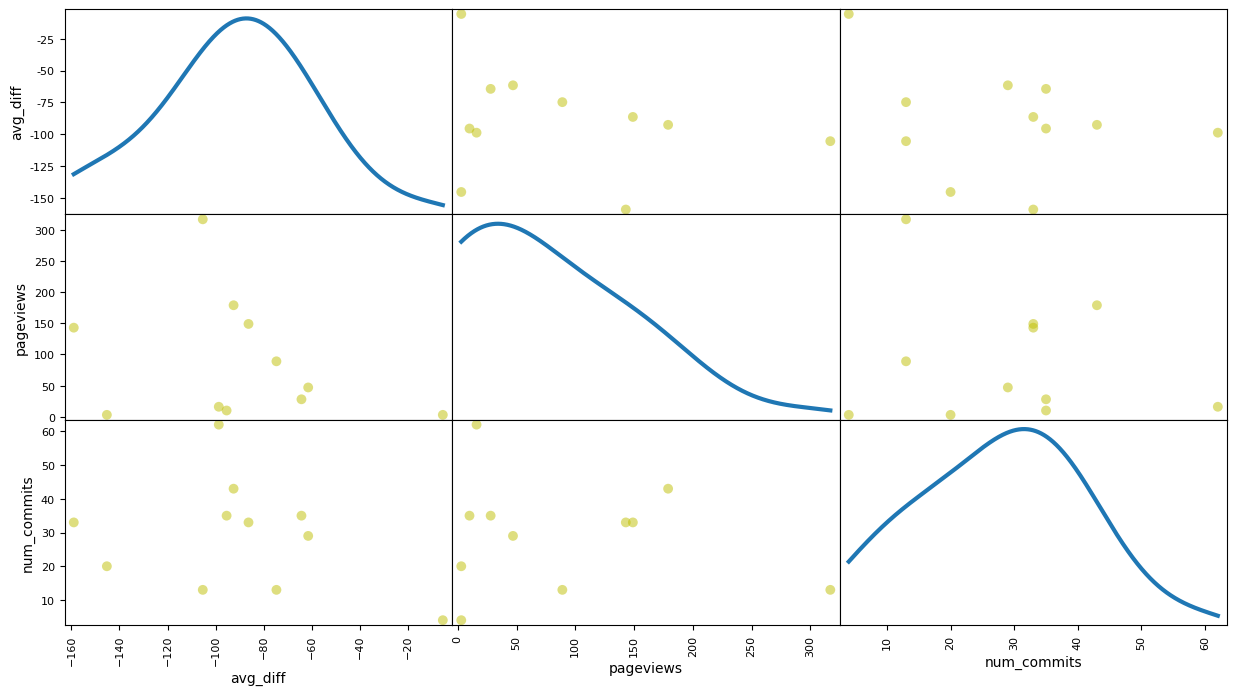

In [3]:
scatter_matrix(df, figsize=(15,8), density_kwds={'linewidth':3}, diagonal='kde', s=200, color='y')

## • at the end of your Jupyter Notebook, create a markdown cell and insert the questions:

◦ “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?”

No

◦ “Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?”

No

◦ “Can we say that there are many users with a low number of commits and a few with a high number of commits”?

Yes

◦ “Can we say that there are many users with a small average difference and a few with a large average difference”?

No

In [4]:
con.close()